# Titanic survival 

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.loc[train.Age<10,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S


In [13]:
train.iloc[:1,:2]

,PassengerId,Survived
0,1,0


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [128]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
print(len(train))
train.isnull().sum(axis=0)

891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train['gender']=train['Sex'].apply(lambda x:0 if x=='male' else 1 )
train['embark']=train['Embarked'].apply(lambda x: 1 if x=='C' else (2 if x=='Q' else 3))
train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
train=train.drop('Cabin',axis=1)

In [9]:
train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000067F14D0438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000067F1564588>]], dtype=object)

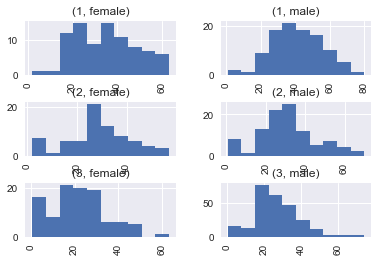

In [92]:
train.hist(by=['Pclass','Sex'],column="Age")

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


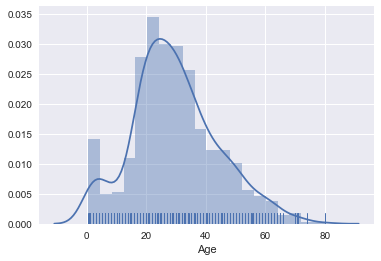

In [7]:
sns.distplot(train['Age'].dropna(),rug=True)

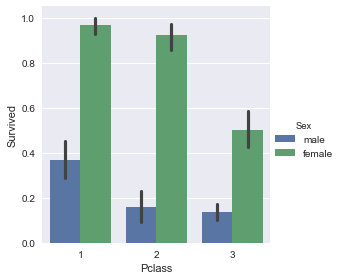

In [214]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train,kind="bar")

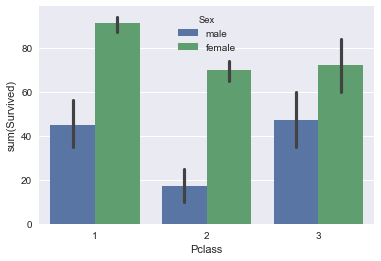

In [28]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train,estimator=sum)

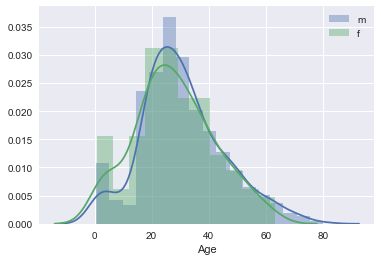

In [147]:
sns.distplot(train.loc[train['Sex']=='male']['Age'].dropna(),label='m')
sns.distplot(train.loc[train['Sex']=='female']['Age'].dropna(),label='f')
plt.legend()
sns.plt.show()

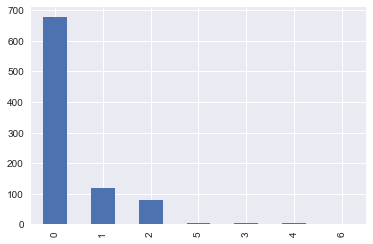

In [118]:
train['Parch'].value_counts().plot(kind='bar')

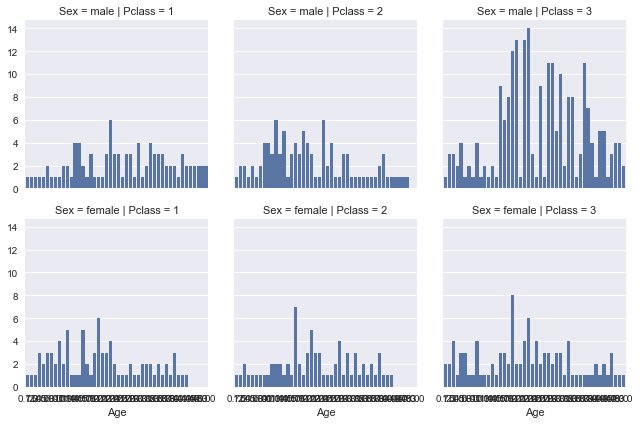

In [31]:
g=sns.FacetGrid(data=train,col='Pclass',row='Sex')
g.map(sns.countplot,"Age")

In [93]:
sum(train['Sex']=='female')

314

In [94]:
pd.pivot_table(train,index=['Pclass','Sex'],values='Age',aggfunc=[len,np.mean])

len       mean
                 Age        Age
Pclass Sex                     
1      female   94.0  34.611765
       male    122.0  41.281386
2      female   76.0  28.722973
       male    108.0  30.740707
3      female  144.0  21.750000
       male    347.0  26.507589

In [105]:
f={'Age':{'missing':lambda x:x.isnull().sum(),'mean':np.mean,'size':len},'Survived':{'survive_rate':np.mean}}
train.groupby(['Pclass','Sex']).agg(f)

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Age                       Survived
              missing       mean   size survive_rate
Pclass Sex                                          
1      female     9.0  34.611765   94.0     0.968085
       male      21.0  41.281386  122.0     0.368852
2      female     2.0  28.722973   76.0     0.921053
       male       9.0  30.740707  108.0     0.157407
3      female    42.0  21.750000  144.0     0.500000
       male      94.0  26.507589  347.0     0.135447

In [126]:
train.groupby(['Sex']).agg({"Survived":['mean','size']})

Survived     
            mean size
Sex                  
female  0.742038  314
male    0.188908  577

In [10]:
train.groupby(['Sex'])['Survived'].agg(['mean','size'])

,mean,size
Sex,,
female,0.742038,314
male,0.188908,577


In [123]:
train.groupby(['Embarked','Sex']).agg({"Survived":['mean','size']})

Survived     
                     mean size
Embarked Sex                  
C        female  0.876712   73
         male    0.305263   95
Q        female  0.750000   36
         male    0.073171   41
S        female  0.689655  203
         male    0.174603  441

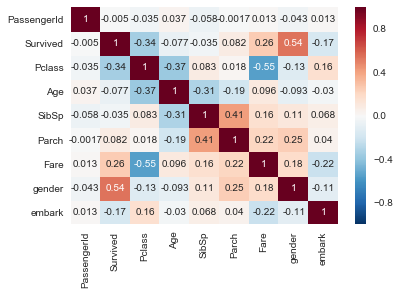

In [10]:
sns.heatmap(train.corr(),annot=True)

In [11]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
train=train.drop(['PassengerId','Name','Ticket'],axis=1)

In [32]:
train=train.drop(['Embarked','Sex'],axis=1)

In [53]:
train=train[train['Age'].notnull()]
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,embark
0,0,3,22.0,1,0,7.2500,0,3
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,3
3,1,1,35.0,1,0,53.1000,1,3
4,0,3,35.0,0,0,8.0500,0,3


## Model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [49]:
train_x,test_x,train_y,test_y=train_test_split(train[train.columns[1:]],train['Survived'],test_size=0.2,random_state=0) #random_state seed

In [65]:
model=svm.SVC(kernel='linear',C=1,gamma=0.01) #rdf:radial kernel
model.fit(train_x,train_y)
prediction1=model.predict(test_x)
metrics.accuracy_score(prediction1,test_y)

0.79720279720279719

In [59]:
model=LogisticRegression()
model.fit(train_x,train_y)
prediction2=model.predict(test_x)
metrics.accuracy_score(prediction2,test_y)

0.82517482517482521

In [63]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction3=model.predict(test_x)
metrics.accuracy_score(prediction3,test_y)

0.73426573426573427

In [70]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
prediction4=model.predict(test_x)
metrics.accuracy_score(prediction4,test_y)

0.67832167832167833

In [71]:
model=GaussianNB()
model.fit(train_x,train_y)
prediction5=model.predict(test_x)
metrics.accuracy_score(prediction5,test_y)

0.78321678321678323

In [72]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_x,train_y)
prediction6=model.predict(test_x)
metrics.accuracy_score(prediction6,test_y)

0.79020979020979021

## Cross-Validation

In [73]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [75]:
kfold = KFold(n_splits=10, random_state=1)
average=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train[train.columns[1:]],train['Survived'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    average.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':average,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.779988,0.031555
Radial Svm,0.700567,0.054779
Logistic Regression,0.784272,0.024823
KNN,0.703326,0.055289
Decision Tree,0.760622,0.045202
Naive Bayes,0.788615,0.032098
Random Forest,0.794308,0.057309


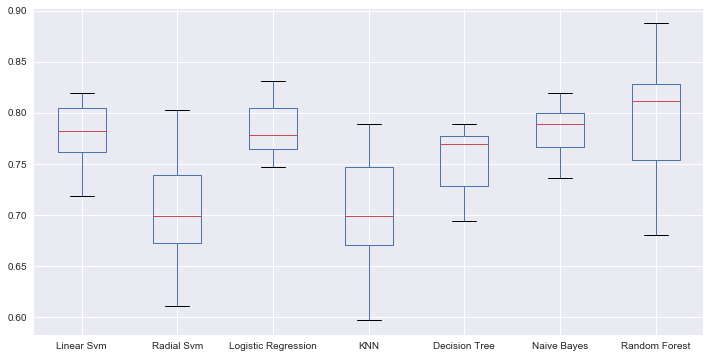

In [80]:
box=pd.DataFrame(accuracy,index=[classifiers])
plt.subplots(figsize=(12,6))
box.T.boxplot()

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Naive Bayes,Random Forest
0,0.819444,0.611111,0.777778,0.597222,0.694444,0.736111,0.680556
1,0.805556,0.625000,0.805556,0.680556,0.763889,0.763889,0.819444
2,0.763889,0.694444,0.777778,0.666667,0.722222,0.763889,0.736111
3,0.819444,0.666667,0.805556,0.694444,0.777778,0.819444,0.805556
4,0.760563,0.718310,0.760563,0.661972,0.788732,0.788732,0.845070
5,0.774648,0.746479,0.760563,0.774648,0.774648,0.774648,0.774648
6,0.718310,0.690141,0.746479,0.704225,0.746479,0.788732,0.746479
7,0.746479,0.746479,0.774648,0.704225,0.704225,0.802817,0.816901
8,0.788732,0.704225,0.802817,0.760563,0.774648,0.788732,0.830986
9,0.802817,0.802817,0.830986,0.788732,0.859155,0.859155,0.887324


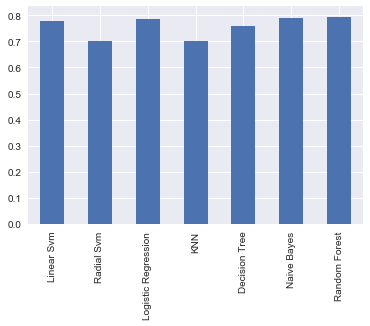

In [86]:
new_models_dataframe2['CV Mean'].plot("bar")

## Voting Classifier

In [90]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft')
ensemble_lin_rbf.fit(train_x,train_y)
ensemble_lin_rbf.score(test_x,test_y)


0.79720279720279719

In [91]:
cross=cross_val_score(ensemble_lin_rbf,train[train.columns[1:]],train['Survived'], cv = kfold,scoring = "accuracy")
cross.mean()


0.79851330203442872

## bagging

In [94]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
metrics.accuracy_score(prediction,test_y)
result=cross_val_score(model,train[train.columns[1:]],train['Survived'], cv = kfold,scoring = "accuracy")
result.mean()

0.71028951486697955

## boosting

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,train[train.columns[1:]],train['Survived'],cv=kfold,scoring='accuracy')
result.mean()

0.76480829420970264

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,train[train.columns[1:]],train['Survived'],cv=kfold,scoring='accuracy')
result.mean()

0.78996478873239429

In [104]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,train[train.columns[1:]],train['Survived'],cv=kfold,scoring='accuracy')
result.mean()

ModuleNotFoundError: No module named 'xgboost'